In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load your dataset
df = pd.read_csv("ecommerce_transactions_dataset.csv") 
# top 5 row
print(df.head())

                                OrderID     CustomerName  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d     Daniel Doyle   
1  b38a088c-a65e-4389-b74d-0fb132e70629  Connie Lawrence   
2  6142ea7d-17be-4111-9a2a-73ed562b0f79       Ryan Munoz   
3  a9488d99-0bbb-4599-91ce-5dd2b45ed1f0     Dylan Miller   
4  aefcfad8-efc8-4849-b3aa-7efe4458a885     Lisa Jackson   

               CustomerEmail           City   OrderDate     Product  Quantity  \
0   garzaanthony@example.org   East William  2024-04-29  Smartphone         3   
1      blakeerik@example.com  Joshuaborough  2025-04-05    Keyboard         4   
2    blairamanda@example.com  New Kellystad  2024-11-17     Monitor         3   
3  michellejames@example.com  Franciscostad  2024-07-05  Smartphone         1   
4      frankgray@example.net      Lake Mark  2025-01-26  Smartphone         2   

   Discount(%)  TotalPrice($) PaymentMethod Shipped  
0            5         2280.0   Credit Card     Yes  
1            0          400.0    Debit Card 

In [4]:
# 3. Preprocessing
# Check basic info
df.info()

# Check missing values
df.isnull().sum()

# Fill or drop missing values (example)
df = df.dropna()

# 3. Preprocessing
df['OrderDate'] = pd.to_datetime(df['OrderDate'],format='%Y-%m-%d')
df.rename(columns={'Discount(%)': 'Discount', 'TotalPrice($)': 'TotalPrice'}, inplace=True)

# Preview cleaned data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        10000 non-null  object        
 1   CustomerName   10000 non-null  object        
 2   CustomerEmail  10000 non-null  object        
 3   City           10000 non-null  object        
 4   OrderDate      10000 non-null  datetime64[ns]
 5   Product        10000 non-null  object        
 6   Quantity       10000 non-null  int64         
 7   Discount       10000 non-null  int64         
 8   TotalPrice     10000 non-null  float64       
 9   PaymentMethod  10000 non-null  object        
 10  Shipped        10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 859.5+ KB
                                OrderID     CustomerName  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d     Daniel Doyle   
1  b38a088c-a65e-4389-b74d

In [5]:
# 4. Descriptive statistics
print(df.describe())


                        OrderDate      Quantity      Discount    TotalPrice
count                       10000  10000.000000  10000.000000  10000.000000
mean   2024-10-19 02:15:04.320000      2.509400      3.262500    809.504650
min           2024-04-20 00:00:00      1.000000      0.000000     42.500000
25%           2024-07-20 00:00:00      2.000000      0.000000    190.000000
50%           2024-10-19 00:00:00      3.000000      0.000000    360.000000
75%           2025-01-17 00:00:00      3.000000      5.000000    800.000000
max           2025-04-20 00:00:00      4.000000     15.000000   4800.000000
std                           NaN      1.111231      4.528316   1056.070279


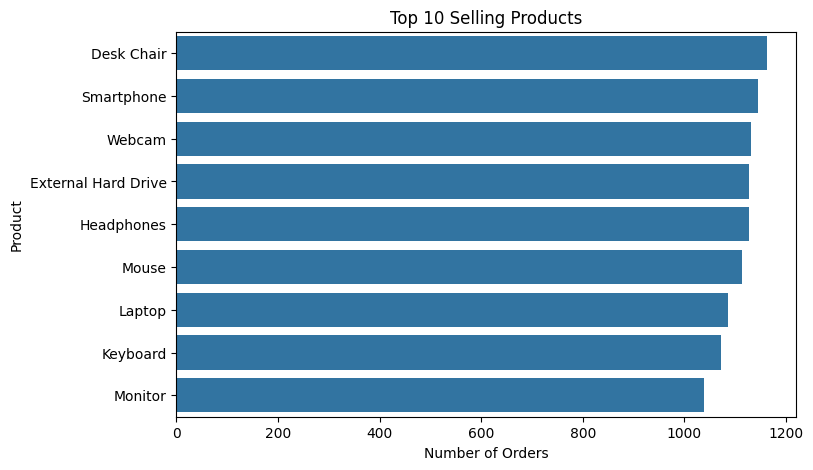

In [6]:
# 5. Top-selling products
top_products = df['Product'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product")
plt.show()

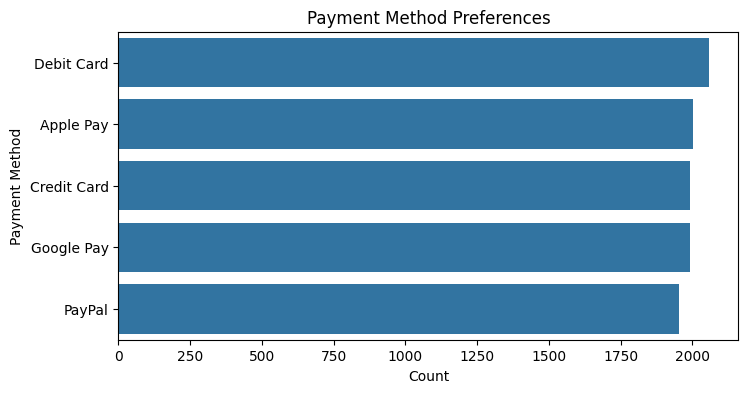

In [8]:
# 6. Payment preferences
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='PaymentMethod', order=df['PaymentMethod'].value_counts().index)
plt.title("Payment Method Preferences")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

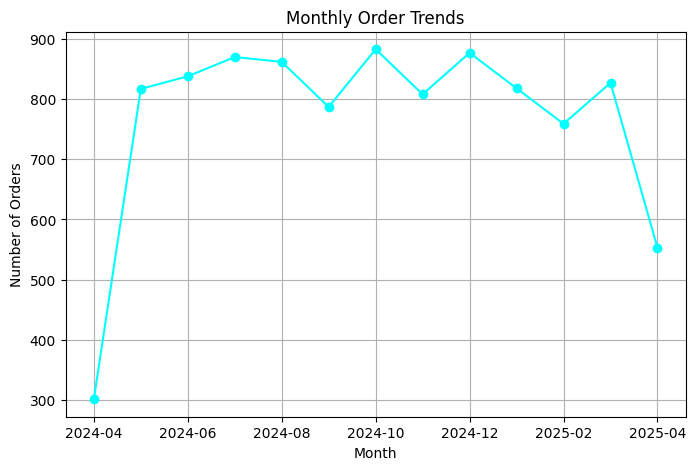

In [10]:
# 7. Monthly Order Trends
monthly_orders = df.groupby(df['OrderDate'].dt.to_period('M')).size()
monthly_orders.index = monthly_orders.index.astype(str)

plt.figure(figsize=(8, 5))
monthly_orders.plot(kind='line', marker='o', color='cyan')
plt.title("Monthly Order Trends")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

In [11]:
# 8. Total Revenue
total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $8,095,046.50


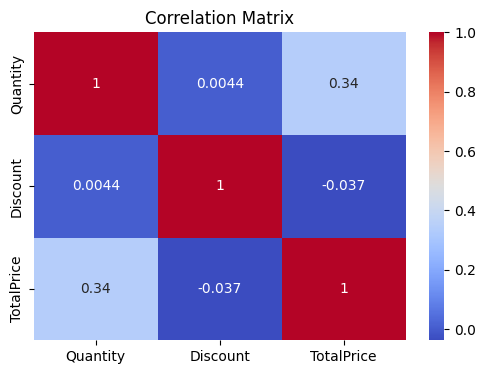

In [12]:
# 9. Correlation analysis
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Quantity', 'Discount', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
# 10. Export cleaned dataset
df.to_csv("ecommerce_cleaned.csv", index=False)
print("Cleaned data exported as 'ecommerce_cleaned.csv'")

Cleaned data exported as 'ecommerce_cleaned.csv'
